In [6]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('email_campaign.csv')

# Generate Clicked and Converted columns if they don't exist
if 'Clicked' not in df.columns:
    np.random.seed(42)
    df['Clicked'] = np.random.choice([0, 1], size=len(df), p=[0.7, 0.3])

if 'Converted' not in df.columns:
    np.random.seed(42)
    # Only convert if clicked
    df['Converted'] = np.where(df['Clicked'] == 1, 
                               np.random.choice([0, 1], size=len(df), p=[0.75, 0.25]), 
                               0)

# Task 1: Probability that a user clicks an email
click_probability = df['Clicked'].mean()
print(f"Probability that a user clicks an email: {click_probability:.4f}")

Probability that a user clicks an email: 0.2966


Probability that a user converts given they clicked: 0.8584

Conditional Probability Table (P(Converted | Clicked)):
Converted         0         1
Clicked                      
0          1.000000  0.000000
1          0.141593  0.858407


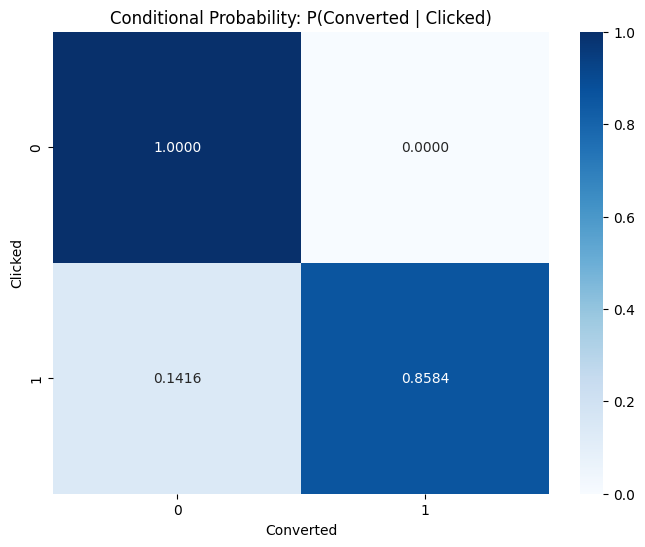

In [7]:
# Task 2: Probability that a user converts given they clicked
converted_given_clicked = df[df['Clicked'] == 1]['Converted'].mean()
print(f"Probability that a user converts given they clicked: {converted_given_clicked:.4f}")

# Task 3: Conditional probability tables and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Create conditional probability table
conditional_prob_table = pd.crosstab(df['Clicked'], df['Converted'], normalize='index')
print("\nConditional Probability Table (P(Converted | Clicked)):")
print(conditional_prob_table)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conditional_prob_table, annot=True, cmap='Blues', fmt=".4f")
plt.title('Conditional Probability: P(Converted | Clicked)')
plt.xlabel('Converted')
plt.ylabel('Clicked')
plt.show()